# TED Talk
Founded in 1984 by Richard Saulman as a non profit organisation that aimed at bringing experts from the fields of Technology, Entertainment and Design together, TED Conferences have gone on to become the Mecca of ideas from virtually all walks of life. As of 2015, TED and its sister TEDx chapters have published more than 2000 talks for free consumption by the masses and its speaker list boasts of the likes of Al Gore, Jimmy Wales, Shahrukh Khan and Bill Gates.

<img align="center" src="TED.gif" title="Title text"/>

### Assumption and Limitations:
1. Data until September 21st, 2017. 
2. For the feature extraction we have considered top 35 tags out of 469.
3. For the feature extraction we have considered top 10 occupations pf the speakers out of 1351.

#### Reason being, more the featuers it will over fit the model.


## What we are predicting?

#### How much a video will reach popularity (in terms of views)?

## Contents:
1. Exploratory
2. Feature Extraction
3. Regression Model Implementation and Analysis
4. Neural Network algorithm and training
5. Conclustion and future research

# 1. Exploratory Data Analysis

In [29]:
%matplotlib inline
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from pandas.io.json import json_normalize
from sklearn import linear_model
from collections import Counter
from textblob import TextBlob
from sklearn import metrics
from scipy import ndimage
from scipy import stats
from PIL import Image
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import textblob
import datetime
import operator
import scipy
import json
import nltk
import time
import h5py
import ast
import re

In [39]:
df = pd.read_csv('./ted_main.csv')
df3 = pd.read_csv("./transcripts.csv")
df4 = df

df.head()

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,1140825600,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,"['children', 'creativity', 'culture', 'dance',...",Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110
1,265,With the same humor and humanity he exuded in ...,977,TED2006,1140825600,43,Al Gore,Al Gore: Averting the climate crisis,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...","[{'id': 243, 'hero': 'https://pe.tedcdn.com/im...",Climate advocate,"['alternative energy', 'cars', 'climate change...",Averting the climate crisis,https://www.ted.com/talks/al_gore_on_averting_...,3200520
2,124,New York Times columnist David Pogue takes aim...,1286,TED2006,1140739200,26,David Pogue,David Pogue: Simplicity sells,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 964}, {'i...","[{'id': 1725, 'hero': 'https://pe.tedcdn.com/i...",Technology columnist,"['computers', 'entertainment', 'interface desi...",Simplicity sells,https://www.ted.com/talks/david_pogue_says_sim...,1636292
3,200,"In an emotionally charged talk, MacArthur-winn...",1116,TED2006,1140912000,35,Majora Carter,Majora Carter: Greening the ghetto,1,1151367060,"[{'id': 3, 'name': 'Courageous', 'count': 760}...","[{'id': 1041, 'hero': 'https://pe.tedcdn.com/i...",Activist for environmental justice,"['MacArthur grant', 'activism', 'business', 'c...",Greening the ghetto,https://www.ted.com/talks/majora_carter_s_tale...,1697550
4,593,You've never seen data presented like this. Wi...,1190,TED2006,1140566400,48,Hans Rosling,Hans Rosling: The best stats you've ever seen,1,1151440680,"[{'id': 9, 'name': 'Ingenious', 'count': 3202}...","[{'id': 2056, 'hero': 'https://pe.tedcdn.com/i...",Global health expert; data visionary,"['Africa', 'Asia', 'Google', 'demo', 'economic...",The best stats you've ever seen,https://www.ted.com/talks/hans_rosling_shows_t...,12005869


### Which is the most popular TED Talk?

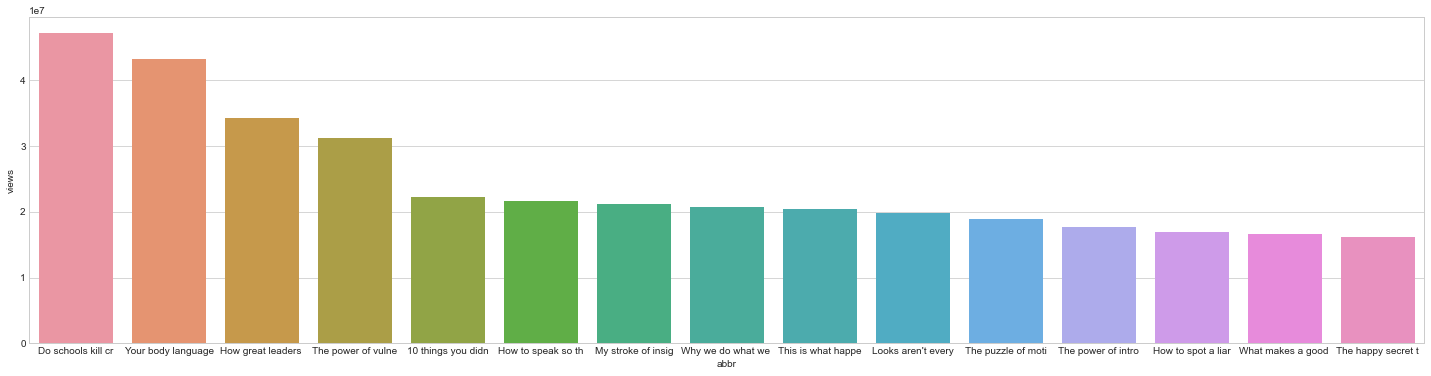

In [31]:
pop_talks = df[['title', 'main_speaker', 'views', 'film_date']].sort_values('views', ascending=False)[:15]
pop_talks['abbr'] = pop_talks['title'].apply(lambda x: x[:18])
sns.set_style("whitegrid")
plt.figure(figsize=(25,6))
sns.barplot(x='abbr', y='views', data=pop_talks)

### What are the most influencing factors contributing in any video's success (no. of views)?

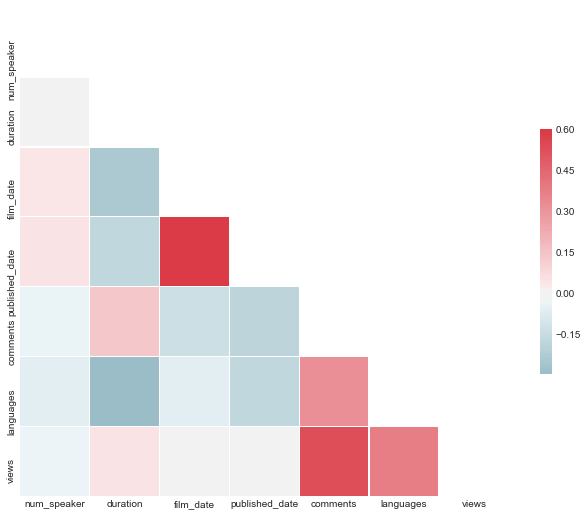

In [32]:
corr = df[['name', 'title', 'description', 'main_speaker', 'speaker_occupation', 'num_speaker', 'duration', 'event', 'film_date', 
           'published_date', 'comments', 'tags', 'languages', 'ratings', 'related_talks', 'url', 'views']].corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.6, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

It is seen that there exist a medium positive correlation between number of views and duration.As the number of views increases,the number of comments also seem to rise.

### How TED Talks are related to one another?

In [33]:
df['tags'] = df['tags'].apply(lambda x: ast.literal_eval(x))  

In [34]:
s = df.apply(lambda x: pd.Series(x['tags']),axis=1).stack().reset_index(level=1, drop=True)
s.name = 'theme'
        
theme_df = df.drop('tags', axis=1).join(s)

len(theme_df['theme'].value_counts())

416

In our dataset, there are 2550 records having one or more tags from 416 unique categories of tags. Hence, two or more talks are related to each other.

### What are the most popular genres?

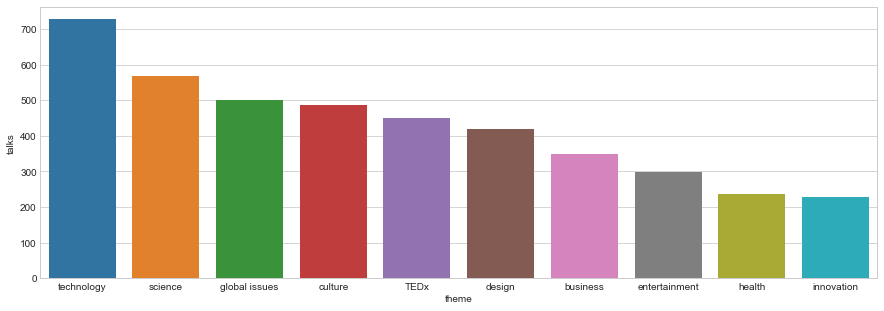

In [35]:
pop_themes = pd.DataFrame(theme_df['theme'].value_counts()).reset_index()
pop_themes.columns = ['theme', 'talks']
plt.figure(figsize=(15,5))
sns.barplot(x='theme', y='talks', data=pop_themes.head(10))
plt.show()

### Do people comment on every TED Talk?

In [36]:
df['comments'].describe()

count    2550.000000
mean      191.562353
std       282.315223
min         2.000000
25%        63.000000
50%       118.000000
75%       221.750000
max      6404.000000
Name: comments, dtype: float64

On average, there are 191.5 comments on every TED Talk. The minimum number of comments on a talk is 2 and the maximum is 6404.

# 2. Feature Extraction

## Date Convertion

<img src="date.png" title="Title text" />

In [37]:
df = df4

df['film_date'] = df['film_date'].apply(lambda x: datetime.datetime.fromtimestamp( int(x)).strftime('%d-%m-%Y'))
df['published_date'] = df['published_date'].apply(lambda x: datetime.datetime.fromtimestamp( int(x)).strftime('%d-%m-%Y'))

df['published_date'] = pd.to_datetime(df['published_date'])
df['film_date'] = pd.to_datetime(df['film_date'])

temp = datetime.date(2018,1,1)
temp = pd.to_datetime(temp)
df['published_date'] = temp - df['published_date']
df['film_date'] = temp - df['film_date']

df['published_date'] = df['published_date'].dt.days
df['film_date'] = df['film_date'].dt.days

## Top 35 Tags extraction

<img src="tags.png" title="Title text" />

In [40]:
df2 = df['tags']
temp = {}
for each in df2.values:
    list = each.split()
    for every in list:
        test = re.sub('[^A-Za-z0-9]+', ' ', every)
        test = test.lower()
        if test in temp.keys():
            temp[test] +=  1
        else:
            temp[test]= 1

new = pd.DataFrame.from_dict(temp, orient="index")

#print(new.sort_values(by = 0, ascending=False).head(15))
topTags = new.sort_values(by = 0, ascending=False).head(35).index

newtopTags = []

for i in topTags:
    newtopTags.append(i.strip())
#print(newtopTags)
xx = pd.DataFrame(0, index=np.arange(len(df)), columns=newtopTags)
#print(xx.shape)
for i in range(len(df)):
    for j in topTags:
        j = str(j).strip()
        if str(j) in str(df['tags'][i]).lower():
            xx[str(j)][i] = 1

frames = [df, xx]
result = pd.concat(frames, axis=1)

print(result.shape)

(2550, 52)


## Sentiment Polarity Extraction - NLP

<img src="transcript.png"  title="Title text" />

In [41]:
polarity = []
subj = []
for t in df3['transcript']:
    tx = TextBlob(t)
    polarity.append(tx.sentiment.polarity)
    subj.append(tx.sentiment.subjectivity)
df3['polarity'] = polarity
df3['subjectivity'] = subj
result = result.merge(df3,on = 'url', how='inner')
print(result.shape)

(2467, 55)


## Ratings Feature Extraction

<img src="rating.png" title="Title text" />

In [42]:
result['ratings'] = result['ratings'].apply(lambda x: eval(str(x)))
json_data = result['ratings'] # your list with json objects (dicts)
newRatings = ['Funny','Beautiful','Ingenious','Courageous','Longwinded','Confusing','Informative','Fascinating','Unconvincing','Persuasive','Jaw-dropping','OK','Obnoxious','Inspiring']
yy = pd.DataFrame(0, index=np.arange(len(result)), columns=newRatings)
ind = 0
for i in json_data:
    for j in i:
        temp = j['name']
        yy[temp][ind] = j['count']
    ind +=1

#print(result.shape)
#print(yy.shape)
frame1 = [result, yy]
result = pd.concat(frame1, axis=1)
print(result.shape)

(2467, 69)


## Description & Title Sujectivity Feature Extraction

<img src="title.png" title="Title text" />

In [43]:
tem1 = []
tem2 = []
tem3 = result['description']
#print(type(tem3))
for i in tem3:
    tem = TextBlob(i)
    tem1.append(tem.sentiment.subjectivity) 
    tem2.append(tem.sentiment.polarity)
    
result['des_subj'] = tem1
result['des_sent'] = tem2
result.columns
print(result.shape)

tem1 = []
tem2 = []
tem3 = result['title']
#print(type(tem3))
for i in tem3:
    tem = TextBlob(i)
    tem1.append(tem.sentiment.subjectivity) 
    tem2.append(tem.sentiment.polarity)
    
result['tit_subj'] = tem1
result['tit_sent'] = tem2
result.columns
print(result.shape)

(2467, 71)
(2467, 73)


## Speaker Occupcation Feature Extraction

<img src="speak.png" title="Title text" />

In [44]:
li = result['speaker_occupation']
lli=[]
lis = []
for i in li:
    if type(i) == str:
        k = i.lower().replace('/',',').replace(';',',').split(',')
        lis.append(k)
        for j in k:
            lli.append(j.strip().lower())
    else:
        lis.append([])
        pass
lid = Counter(lli)



authdf = pd.DataFrame.from_dict(lid, orient="index").sort_values(by=0, ascending=False).head(10).index
newauth = pd.DataFrame(0, index=np.arange(len(result)), columns=authdf)
for i in range(len(result)):
    for j in authdf:
        if str(j) in lis[i]:
            newauth[str(j)][i] = 1
        
frames3 = [result, newauth]
result = pd.concat(frames3, axis=1)
print(result.shape)

(2467, 83)


In [45]:
xyz = result.describe().reset_index()
print(xyz.columns)

Index(['index', 'comments', 'duration', 'film_date', 'languages',
       'num_speaker', 'published_date', 'views', 'technology', 'science',
       'global', 'issues', 'culture', 'tedx', 'design', 'business', 'change',
       'entertainment', 'social', 'ted', 'health', 'innovation', 'society',
       'art', 'future', 'communication', 'biology', 'creativity', 'humanity',
       'collaboration', 'environment', 'economics', 'medicine', 'brain',
       'activism', 'education', 'community', 'history', 'fellows', 'children',
       'music', 'invention', 'care', 'polarity', 'subjectivity', 'Funny',
       'Beautiful', 'Ingenious', 'Courageous', 'Longwinded', 'Confusing',
       'Informative', 'Fascinating', 'Unconvincing', 'Persuasive',
       'Jaw-dropping', 'OK', 'Obnoxious', 'Inspiring', 'des_subj', 'des_sent',
       'tit_subj', 'tit_sent', 'writer', 'author', 'designer', 'artist',
       'entrepreneur', 'inventor', 'activist', 'journalist', 'educator',
       'psychologist'],
      dtype=

(array([2.359e+03, 7.300e+01, 1.400e+01, 1.100e+01, 6.000e+00, 0.000e+00,
        1.000e+00, 1.000e+00, 0.000e+00, 2.000e+00]),
 array([  155895. ,  4863016.5,  9570138. , 14277259.5, 18984381. ,
        23691502.5, 28398624. , 33105745.5, 37812867. , 42519988.5,
        47227110. ]),
 <a list of 10 Patch objects>)

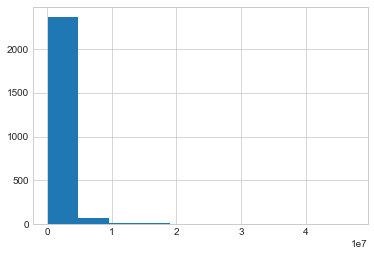

In [46]:
plt.hist((result['views']))

(array([ 26., 180., 532., 959., 475., 185.,  64.,  28.,  14.,   4.]),
 array([5.19283219, 5.4409681 , 5.68910402, 5.93723994, 6.18537586,
        6.43351178, 6.6816477 , 6.92978362, 7.17791953, 7.42605545,
        7.67419137]),
 <a list of 10 Patch objects>)

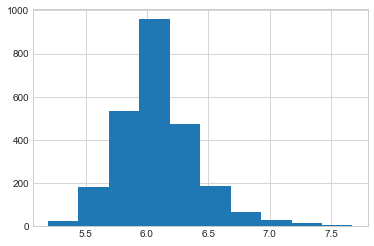

In [47]:
plt.hist(np.log10(result['views']))

# 3. Regression Model Implementation and Analysis

In [48]:
X_temp = result[[ 'comments', 'duration', 'film_date', 'languages',
       'num_speaker', 'published_date', 'views', 'technology', 'science',
       'global', 'issues', 'culture', 'tedx', 'design', 'business', 'change',
       'entertainment', 'social', 'ted', 'health', 'innovation', 'society',
       'art', 'future', 'communication', 'biology', 'creativity', 'humanity',
       'collaboration', 'environment', 'economics', 'medicine', 'brain',
       'activism', 'education', 'community', 'history', 'fellows', 'children',
       'music', 'invention', 'care', 'polarity', 'subjectivity', 'des_subj', 'des_sent',
       'tit_subj', 'tit_sent', 'writer', 'author', 'designer', 'artist',
       'entrepreneur', 'inventor', 'activist', 'journalist', 'educator',
       'psychologist']]
y = np.log10(result['views'])

mu = X_temp.mean(axis=0)
stdv = X_temp.std(axis = 0)
X = (X_temp - mu)/stdv
#X['views'] = y

## Regression Result on Training Set:

In [49]:
print("Training Data Summary")
print("=======================")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10)
Lreg = linear_model.LinearRegression(normalize=True)
Lreg.fit(X_train, y_train)
predicted = Lreg.predict(X_train)
temp1 = Lreg.score(X_train,y_train)
print("Linear Regression Score on Training Data: {}% \n".format(temp1*100))

print("Ridge Regression Scores on Training:")
print("====================================")
li = [0,0.1,0.5,5]
regli = []
for i in li:
    Rreg = linear_model.Ridge(normalize = True, alpha = i)
    Rreg.fit(X_train, y_train)
    regli.append(Rreg)
    predicted1 = Lreg.predict(X_train)
    temp2 = Rreg.score(X_train,y_train)
    print("Score with Alpha {} is {}%".format(i,temp2*100))
    #print(temp2*100)


Training Data Summary
Linear Regression Score on Training Data: 71.5348528065671% 

Ridge Regression Scores on Training:
Score with Alpha 0 is 71.5348528065671%
Score with Alpha 0.1 is 70.95061953856192%
Score with Alpha 0.5 is 65.87913186894066%
Score with Alpha 5 is 31.442273063989056%


## Regression Result on Testing Set:

In [50]:
print("Testing Data Summary")
print("====================")
predicted2 = Lreg.predict(X_test)
temp4 = Lreg.score(X_test,y_test)
print("Linear Regression Score on testing Data is {}% \n".format(temp4*100))
#print(metrics.r2_score(predicted1, y_test)*100)

print("Ridge Regression Scores on Testing:")
print("===================================")
for j in range(4):
    predicted2 = regli[j].predict(X_test)
    temp3 = regli[j].score(X_test,y_test)
    print("Score with Alpha {} is {}%".format(li[j],temp3*100))

Testing Data Summary
Linear Regression Score on testing Data is 69.05913797329892% 

Ridge Regression Scores on Testing:
Score with Alpha 0 is 69.05913797329897%
Score with Alpha 0.1 is 68.558880288523%
Score with Alpha 0.5 is 63.094545645826884%
Score with Alpha 5 is 29.057582010755777%


In [51]:
### Writing to csv file for Neural Network

X.to_csv("./new1.csv")
y.to_csv("./new2.csv")

# 4. Neural Network algorithm and Training

## 3 layers with (100,50,1) hidden units are designed with following options

  **1 ** ) **Hyper Paremters Initialization**
                 - HE Initialization
  **2 ** ) **Forward Propogation**
                 - L layers use Relu activation function
  **3 ** ) **Regulariztion**
                 - lambda with L2 regularization
  **4 ** )  **Cost**
                 - MSE
  **5 ** ) **Optimization**
                 - Gradient Descent Algorithm
                 
### Algorithm Steps:
                 
##### Forward propogration ---> calculate cost ---> Backward Propogation ---> Gradient Derivative --> Update Prameter for n iterations
.

In [52]:
Xpd = pd.read_table("./new1.csv", index_col=0, sep=',')
ypd = pd.read_table("./new2.csv", index_col=0, sep=',', header=None)
X_el = np.matrix(Xpd)
Y_el = np.matrix(ypd)
X, X_test, Y, y_test = train_test_split(X_el, Y_el, test_size=0.10, random_state=324)
X = X.T
print(Y.shape) #(m,1)
print(X.shape) #(n,m)

(2220, 1)
(58, 2220)


### Hyper Parameter (W, b) Initialization

**HE Initiallization ** : This function is similar to the previous `initialize_parameters_random(...)`. The only difference is that instead of multiplying `np.random.randn(..,..)` by 10, you will multiply it by $\sqrt{\frac{2}{\text{dimension of the previous layer}}}$, which is what He initialization recommends for layers with a ReLU activation. 

In [53]:
def initialize_parameters_deep(layers_dims,initialization="he"):

    np.random.seed(3)
    parameters = {}
    L = len(layers_dims)            # number of layers in the network
    

    for l in range(1, L):
        
        if initialization == "zeros":
            parameters['W' + str(l)] = np.zeros((layers_dims[l], layers_dims[l-1]))
            parameters['b' + str(l)] = np.zeros((layers_dims[l],1))
        elif initialization == "random":
            parameters['W' + str(l)] = np.random.randn(layers_dims[l],layers_dims[l-1]) * 0.01
            parameters['b' + str(l)] = np.zeros((layers_dims[l],1))
        elif initialization == "he":
            parameters['W' + str(l)] = np.random.randn(layers_dims[l],layers_dims[l-1]) * np.sqrt(2/layers_dims[l-1])
            parameters['b' + str(l)] = np.zeros((layers_dims[l],1))
        
        assert(parameters['W' + str(l)].shape == (layers_dims[l], layers_dims[l-1]))
        assert(parameters['b' + str(l)].shape == (layers_dims[l], 1))

        
    return parameters


### Foward Propogation



In [54]:
def sigmoid(z):

    s = 1/(1+np.exp(-z))
    return s,z

def relu(z):
    s = (abs(z) + z) / 2
    return s,z

In [55]:
def linear_forward(A, W, b):

    Z = np.dot(W,A) + b
    assert(Z.shape == (W.shape[0], A.shape[1]))
    cache = (A, W, b)
    
    return Z, cache

In [56]:
def linear_activation_forward(A_prev, W, b, activation):

    if activation == "sigmoid":
        # Inputs: "A_prev, W, b". Outputs: "A, activation_cache".
        Z, linear_cache = linear_forward(A_prev,W,b)
        #Z = np.dot(W,A_prev) + b
        A, activation_cache = sigmoid(Z)
        #print("sigmoid")
    
    elif activation == "relu":
        # Inputs: "A_prev, W, b". Outputs: "A, activation_cache".
        Z, linear_cache = linear_forward(A_prev,W,b)
        #Z = np.dot(W,A_prev) + b
        A, activation_cache = relu(Z)
        #print("relu")
    
    assert (A.shape == (W.shape[0], A_prev.shape[1]))
    cache = (linear_cache, activation_cache)

    return A, cache

In [57]:
def L_model_forward(X, parameters,keep_prob=1):


    caches = []
    A = X
    L = len(parameters) // 2                  # number of layers in the neural network
    # Implement [LINEAR -> RELU]*(L-1). Add "cache" to the "caches" list.
    for l in range(1, L):
        A_prev = A 
        #print(A_prev.shape)
        A, cache = linear_activation_forward(A_prev, parameters['W' + str(l)] ,parameters['b' + str(l)], "relu")
        D = np.random.rand(A.shape[0],A.shape[1])
        D = D < keep_prob
        A = np.multiply(A,D )
        A = A/keep_prob
        cache = cache + (D,)
        caches.append(cache)
    
    # Implement LINEAR -> SIGMOID. Add "cache" to the "caches" list.
    AL, cache = linear_activation_forward(A,parameters['W' + str(L)] ,parameters['b' + str(L)],"relu" )
    caches.append(cache)
    assert(AL.shape == (1,X.shape[1]))
            
    return AL, caches

### Cost Computation 
### L2 Regularization

The standard way to avoid overfitting is called **L2 regularization**. It consists of appropriately modifying your cost function, from:
$$J = \frac{1}{2m} \sum\limits_{i = 1}^{m} \left(y^{(i)}- a^{[L](i)}\right)^{2} \tag{1}$$
To:
$$J_{regularized} = \small \underbrace{\frac{1}{2m} \sum\limits_{i = 1}^{m} \left(y^{(i)}- a^{[L](i)}\right)^{2} }_\text{cross-entropy cost} + \underbrace{\frac{1}{m} \frac{\lambda}{2} \sum\limits_l\sum\limits_k\sum\limits_j W_{k,j}^{[l]2} }_\text{L2 regularization cost} \tag{2}$$


In [58]:
def compute_cost(AL, Y,parameters,lambd,regularized=False):

    m = Y.shape[1]
    cross_entropy_cost = (1/(2*m))* np.sum(np.square(AL - Y))
    loop_len = len(parameters)//2
    
    if regularized == True:
        temp = 0
        for i in range(1,loop_len+1):
            temp += np.sum(np.square(parameters['W' + str(i)]))
        L2_regularization_cost = (1/m) * (lambd/2) * temp
        cost = cross_entropy_cost + L2_regularization_cost
    else:
        cost = cross_entropy_cost

    cost = np.squeeze(cost)
    assert(cost.shape == ())
    
    return cost

### Back Propogation

.

In [59]:
def linear_backward(dZ, cache,D,lambd,keep_prob,val):

    #linear_cache, activation_cache,D = cache

    linear_cache, activation_cache, dummy= cache
    A_prev, W, b = linear_cache
    m = A_prev.shape[1]
    dA_prev = np.dot(W.T, dZ)
    if val ==0:
        dZ_prev = None
    else:
        dA_prev = np.multiply(dA_prev,D )
        dA_prev = dA_prev/keep_prob
        dZ_prev = np.multiply(dA_prev, np.int64(A_prev > 0))
    
    dW = (1./m) * np.dot(dZ,A_prev.T) + ((lambd/m) * W)
    db = (1./m) * np.sum(dZ,axis=1)
    assert (dA_prev.shape == A_prev.shape)
    assert (dW.shape == W.shape)
    assert (db.shape == b.shape)
    return dZ_prev, dA_prev, dW, db

In [60]:
def L_model_backward(AL, Y, caches, lambd,keep_prob):

    grads = {}
    L = len(caches) # the number of layers
    #print(L)
    m = AL.shape[1]
    Y = Y.reshape(AL.shape) # after this line, Y is the same shape as AL
    
    # Initializing the backpropagation and dZL for last layer 
    dAL = - (np.divide(Y, AL) - np.divide(1 - Y, 1 - AL))
    linear_cache, activation_cache = caches[L-1]
    A_prev2, W3, b3 = linear_cache
    
    dZ_prev3 = AL - Y
    grads["dW" + str(L)] = 1./m * np.dot(dZ_prev3, A_prev2.T)+((lambd/m) * W3)
    grads["db" + str(L)] = 1./m * np.sum(dZ_prev3, axis=1)
    
    dA_prev2 = np.dot(W3.T, dZ_prev3)
    linear_cache, activation_cache,D = caches[L-2]
    dA_prev2 = np.multiply(D,dA_prev2)
    dA_prev2 = dA_prev2/keep_prob
    dZ = np.multiply(dA_prev2, np.int64(A_prev2 > 0))
    x, y,D_prev = caches[L-3]
    
    # Loop from l=L-2 to l=0
    for l in reversed(range(L)):
        # lth layer: (RELU -> LINEAR) gradients.
        # Inputs: "grads["dA" + str(l + 1)], current_cache". Outputs: "grads["dA" + str(l)] , grads["dW" + str(l + 1)] , grads["db" + str(l + 1)] 
        current_cache = caches[l-1]
        D = D_prev
        val = l - 1
        dZ_prev, dA_prev_temp, dW_temp, db_temp = linear_backward(dZ, current_cache, D,lambd,keep_prob, val)
        if val ==0:
            pass
        else:
            x, y, D_prev = caches[l-2]
        dZ = dZ_prev
        #grads["dA" + str(l)] = dA_prev_temp
        grads["dW" + str(l)] = dW_temp
        grads["db" + str(l)] = db_temp
        if val ==0:
            break
    
    return grads

### Updating Hyper Parameters Based on Gradient Descent Derivative

.

In [61]:
def update_parameters(parameters, grads, learning_rate):

    L = len(parameters) // 2 # number of layers in the neural network

    # Update rule for each parameter. Use a for loop.
    for l in range(L):
        parameters["W" + str(l+1)] = parameters["W" + str(l+1)] - learning_rate * grads["dW" + str(l + 1)]
        parameters["b" + str(l+1)] = parameters["b" + str(l+1)] - learning_rate * grads["db" + str(l + 1)]
    return parameters


### Deep Learning Model

.

In [62]:
def model(X, Y, learning_rate = 0.3, num_iterations = 5000, print_cost = True, lambd = 0.01, keep_prob = 1):
        
    grads = {}
    costs = []                            # to keep track of the cost
    m = X.shape[1]                        # number of examples
    layers_dims = [X.shape[0],100,50, 1]
    parameters = initialize_parameters_deep(layers_dims,"random")

    # Loop (gradient descent)
    for i in range(0, num_iterations):
        AL, cache = L_model_forward(X, parameters,keep_prob)
        cost = compute_cost(AL, Y.T,parameters,lambd,True)
        grads = L_model_backward(AL, Y, cache, lambd,keep_prob)

        parameters = update_parameters(parameters, grads, learning_rate)
        
        if print_cost and i % 1000 == 0:
            print("Cost after iteration {}: {}".format(i, cost))
            if (i>= 3000):
                x = str(input("Wanna continue?"))
                if x == str("No"):
                    break
        if print_cost and i % 1000 == 0:
            costs.append(cost)
    
    # plot the cost
    plt.plot(costs)
    plt.ylabel('cost')
    plt.xlabel('iterations (x1,000)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()
    
    return parameters,grads

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


Cost after iteration 0: 18.611567691419342
Cost after iteration 1000: 0.004840028778002491
Cost after iteration 2000: 0.004198873102685718
Cost after iteration 3000: 0.004008277615703265
Cost after iteration 4000: 0.003919074178387719


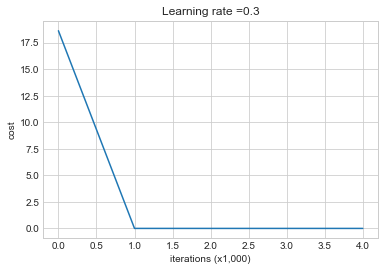

In [63]:
parameters,grads = model(X, Y, lambd=4)

In [64]:
print("On the train set:")
print("=================")
AL, xx = L_model_forward(X, parameters)
te = metrics.r2_score(AL.T, Y)
print("Score: {}%".format(te*100))
print("On the Testing set:")
print("===================")
Y_predicted, xx = L_model_forward(X_test.T, parameters)
tem = metrics.r2_score(Y_predicted.T, y_test)
print("Score: {}%".format(tem*100))

On the train set:
Score: 98.57682892296857%
On the Testing set:
Score: 97.26941430678424%


In [65]:
print(y_test[:5].T)
print(Y_predicted[0,:5])

[[6.30752898 5.84710542 6.0216837  5.71843276 5.88094215]]
[[6.29944024 5.77557152 6.02169579 5.74888775 5.90701025]]


# 5. Conclusion:

### TED organization can employ this model to predict the wide reach or popularity of a new video. For instance, when a new talk is published under a certain category eg: Technology, Education, etc. and talk duration, Speaker, Tags this model will predict the popularity with 97% confidence.

# Future Work:

### 1. Youtube like next ted talk recommendation system can be developed.

### 2. Transcripts of all the talks can be translated into other languages using machine translation system employing Deep Neural Network and LSTM models.






# Questions??